In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [37]:
data = pd.read_csv("../../data/ld50/train.csv")
test_data = pd.read_csv("../../data/ld50/test.csv")
embeddings = pd.read_csv("train_embeddings.csv")

classes = data["Class"]
ld50 = data["ld50"].rename("LD50")
ld50_test = test_data["ld50"].rename("LD50")
test_classes = test_data["Class"]

class_labels = ["Alta", "Moderado", "Leve", "Desprezível"][::-1]

In [3]:
pca = PCA(2)
low_dim_embeddings = pca.fit_transform(embeddings)

Text(0.5, 1.0, 'LD50 dos embeddings de treino')

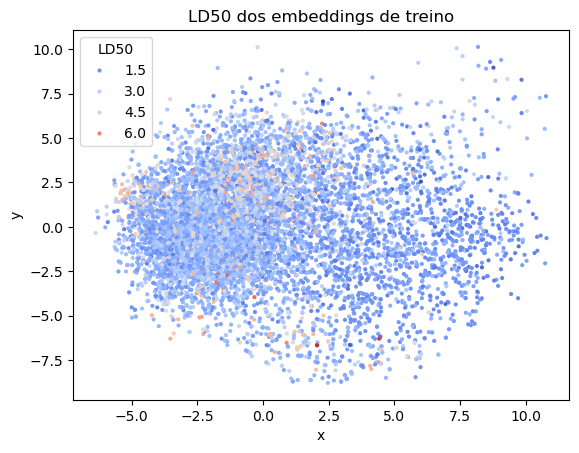

In [4]:
scatter_df = pd.DataFrame({
    'x': low_dim_embeddings[:, 0],
    'y':low_dim_embeddings[:, 1],
    'class': classes,
    'LD50': ld50
})
sns.scatterplot(scatter_df, x="x", y="y", hue="LD50", palette='coolwarm', linewidth=0, marker='.').set_title("LD50 dos embeddings de treino")

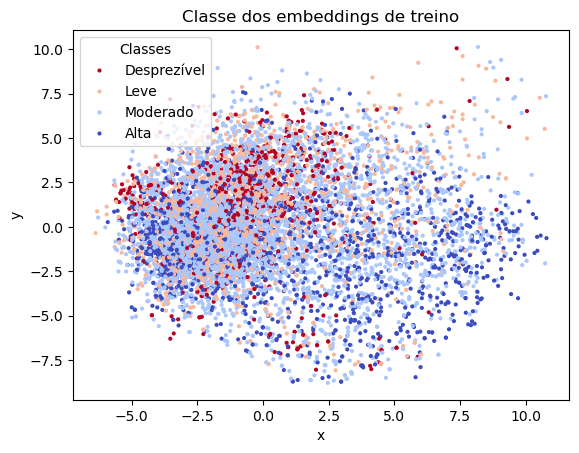

In [29]:
g = sns.scatterplot(scatter_df, x='x', y='y', hue='class', palette='coolwarm_r', linewidth=0, marker='.')
g.set_title("Classe dos embeddings de treino")
g.legend_.set_title("Classes")
sns.move_legend(g, 'upper left')

for t, l in zip(g.legend_.texts, class_labels):
    t.set_text(l)

0       2
1       1
2       3
3       2
4       1
       ..
2661    2
2662    0
2663    3
2664    2
2665    2
Name: Class, Length: 10663, dtype: int64

Text(0.5, 1.0, 'Distribuição de LD50 por classe')

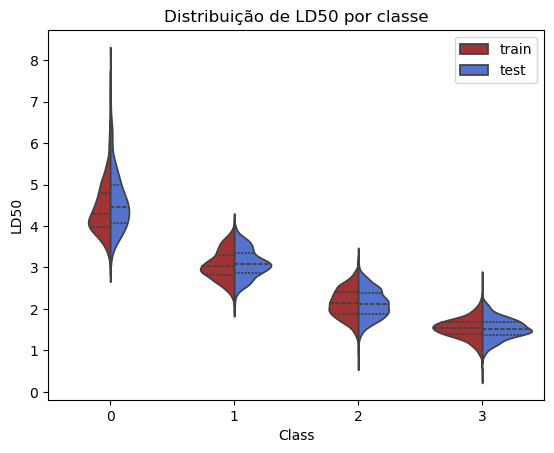

In [48]:
sns.violinplot(x=pd.concat([classes, test_classes]), 
               y=pd.concat([ld50, ld50_test],),
               hue=["Train"]*len(classes) + ["Test"] * len(test_classes),
               split=True,
               inner='quart',
               palette=['firebrick', 'royalblue']).set_title("Distribuição de LD50 por classe")

Text(0.5, 1.0, 'Distribuição de LD50')

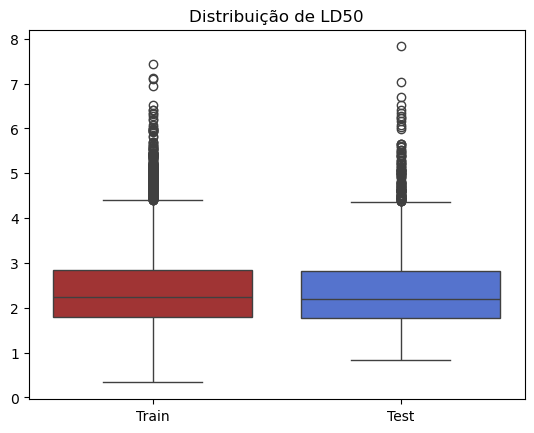

In [49]:
sns.boxplot(pd.DataFrame({"Train": ld50, "Test": ld50_test}), palette=['firebrick', 'royalblue']).set_title("Distribuição de LD50")

Class
2    4093
1    1671
3    1524
0     709
2    1395
1     548
3     517
0     206
Name: count, dtype: int64

[Text(0, 0, '709'), Text(0, 0, '1671'), Text(0, 0, '4093'), Text(0, 0, '1524')]

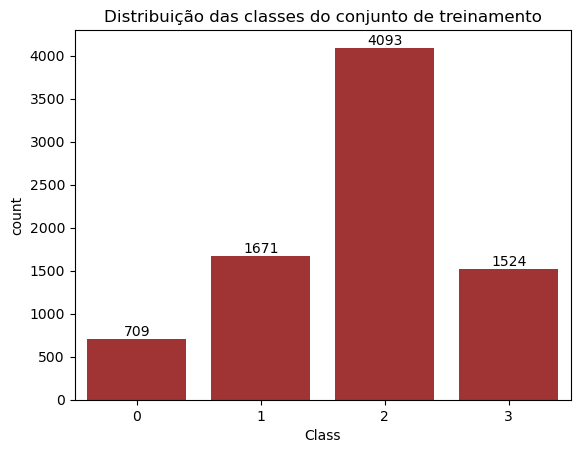

In [59]:
ax = sns.barplot(classes.value_counts(), color='firebrick')
ax.set_title("Distribuição das classes do conjunto de treinamento")
ax.bar_label(ax.containers[0])